In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)

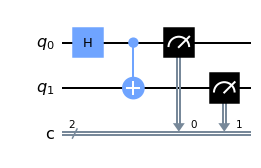

In [3]:
qc.measure(range(2), range(2))
qc.draw()

In [4]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(qc, backend, shots=1024)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
Results_simulator = job_simulator.result()

In [6]:
counts = Results_simulator.get_counts(qc)

In [7]:
print(counts)

{'11': 517, '00': 507}


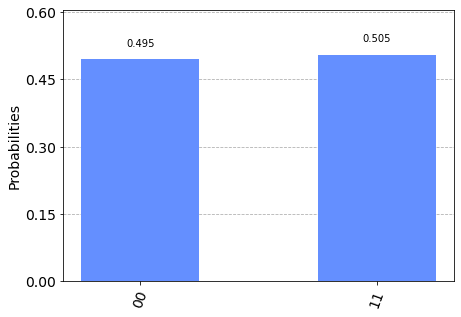

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [11]:
provider = IBMQ.get_provider(hub='ibm-q-community', group='iisc-hackathon', project='main')
backend = provider.get_backend('ibmq_manila')
print(backend)
#provider.backends()

ibmq_manila


In [10]:
#backend = provider.get_backend("ibmq_quito")

In [12]:
job_simulator = execute(qc, backend, shots=1024)
Results_simulator = job_simulator.result()
counts = Results_simulator.get_counts(qc)
print(counts)

{'00': 498, '01': 18, '10': 28, '11': 480}


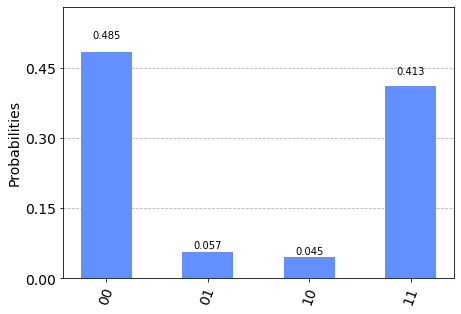

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [13]:
# First, see what devices we are allowed to use by loading our saved accounts
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')


ibmqfactory.load_account:WARNING:2022-01-05 16:08:13,569: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
# get the least-busy backend at IBM and run the quantum circuit there
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)  # displays job status under cell


Job Status: job has successfully run
